# Methodology
- 10 architectures genere each step 
- same training
- same dataset

First of all the generator create architectures randomly and hyperparameters too
but results of training (accuracy + loss) was bad too much error (negative dimension) or the architecture begin without input,...

So we try to controle the architecture using a stat machine and getting the feature extraction dimension to be reduce to 1 and hyperparameters always random<br>
but results was still bad for the best architecture have 0.30 for the accuracy and for others we got vanishing gradient problem

Next we try to put some intelligence in hyperparameters like dense units descending
the results was better 4 of them was at least at 0.9 for the accuracy but the others got vanishing gradient problem<br>
so we try to modify manualy the architecture with a problem :
    <br>2 architectures was selected --> modify architecture + hyperparameters but only the Clasification part (Dense Layer)
    <br>and the problem found was the same for the 2 
    <br>Got to much Dense Layers or not enough

After that the generator was modified to make more sence for the classification part (Dense Layer) for this we compute the number of parameters (for exemple the output of the last layer before Flatten got (5,5,6) so we got 5*5*6 = 150 parameters)<br>
so if parameters is upper than 100 we take 30% of the value then we take 70% (those value is totally arbitrary)<br>
else we divide it by 2<br>
finally we add a other dense layer with units = nomber of class<br>
the results was great at least 0.9 for accuracy

with previous step we reduce the variability (not to much permisive) now we'll try to revese, that means we'll add more variability and be more permisif
here for the fearture extraction part, we don't force the dimension to be reduce to 1 
results is kinda the same

We change the data set for cifar10 for the next test

In [1]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import glob

In [2]:
def str_to_float(l):
    l2 = list()
    for i in l:
        l2.append(float(i))
        
    return l2

In [3]:
data = pd.read_csv('architecture_results.csv')

In [4]:
data

,file_name,training_time(s),result_loss,result_acc,nb_layers
0,archi_random_1_v,88.100919,4.787491798400879,0.0003,NaN
1,archi_random_2_v,36.514282,4.787491798400879,0.0,NaN
2,archi_random_3_v,0.000000,Error,Error,NaN
3,archi_random_4_v,0.000000,Error,Error,NaN
4,archi_random_5_v,0.000000,Error,Error,NaN
...,...,...,...,...,...
65,archi_random_6_v,107.269466,1.3648234617233277,0.5139,14.0
66,archi_random_7_v,59.813792,1.0785408752441406,0.6318,7.0
67,archi_random_8_v,40.819419,1.1243187145233153,0.6057,10.0
68,archi_random_9_v,264.545941,2.313665362548828,0.1,14.0


# Test 1 : Random 
- architecture + hyperparameter random

In [5]:
test1 = data[:10]

In [6]:
test1

,file_name,training_time(s),result_loss,result_acc,nb_layers
0,archi_random_1_v,88.100919,4.787491798400879,0.0003,NaN
1,archi_random_2_v,36.514282,4.787491798400879,0.0,NaN
2,archi_random_3_v,0.000000,Error,Error,NaN
3,archi_random_4_v,0.000000,Error,Error,NaN
4,archi_random_5_v,0.000000,Error,Error,NaN
5,archi_random_6_v,0.000000,Error,Error,NaN
6,archi_random_7_v,255.298168,5.478751149749756,0.0899,NaN
7,archi_random_8_v,0.000000,Error,Error,NaN
8,archi_random_9_v,0.000000,Error,Error,NaN
9,archi_random_10_v,0.000000,Error,Error,NaN


# Test 2 : Architecture control
- architecture : control with stat machine
- hyperparameter random

In [7]:
test2 = data[10:20]

In [8]:
test2

,file_name,training_time(s),result_loss,result_acc,nb_layers
10,archi_random_1_v,29.886414,2.1078140058517456,0.2107,NaN
11,archi_random_2_v,34.585087,NaN,0.098,NaN
12,archi_random_3_v,44.384779,1.8254141145706178,0.3238,NaN
13,archi_random_4_v,31.887646,NaN,0.098,NaN
14,archi_random_5_v,36.501743,NaN,0.098,NaN
15,archi_random_6_v,35.660906,NaN,0.098,NaN
16,archi_random_7_v,46.680250,NaN,0.098,NaN
17,archi_random_8_v,53.900858,NaN,0.098,NaN
18,archi_random_9_v,31.916714,NaN,0.098,NaN
19,archi_random_10_v,21.039890,NaN,0.098,NaN


# Test 3 : Hyperparameter control
- architecture : control with stat machine
- hyperparameter --> some intelligence

In [9]:
test3 = data[20:30]

In [10]:
test3

,file_name,training_time(s),result_loss,result_acc,nb_layers
20,archi_random_1_v,48.800441,0.09580338313579559,0.9694,NaN
21,archi_random_2_v,74.769896,NaN,0.098,NaN
22,archi_random_3_v,50.353904,NaN,0.098,NaN
23,archi_random_4_v,67.178742,NaN,0.098,NaN
24,archi_random_5_v,74.898739,NaN,0.098,NaN
25,archi_random_6_v,61.363391,0.6802817797660827,0.7711,NaN
26,archi_random_7_v,34.465207,0.22966426121890546,0.9311,NaN
27,archi_random_8_v,48.856267,NaN,0.098,NaN
28,archi_random_9_v,56.277142,NaN,0.098,NaN
29,archi_random_10_v,29.380182,0.1532185947716236,0.9524,NaN


## Test Modification archi 9

In [11]:
#model = keras.models.Sequential([
#		keras.layers.Input([28, 28, 1]),
#		keras.layers.Conv2D(6, kernel_size=3, strides=2, activation='tanh', padding='same'),
#		keras.layers.AveragePooling2D(pool_size=5, strides=2, padding='valid'),
#		keras.layers.Conv2D(12, kernel_size=5, strides=2, activation='selu', padding='valid'),
#		keras.layers.Flatten(),
#		keras.layers.Dense(256, activation='relu'),
#		keras.layers.Dense(120, activation='selu'),
#		keras.layers.Dense(84, activation='relu'),
#		keras.layers.Dense(10, activation='relu'),
#		keras.layers.Dense(1, activation='softmax'),
#
#	])

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import plot_model

In [13]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# normaliser les pixel 0-255 -> 0-1
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

model = keras.models.Sequential([
        keras.layers.Input([28, 28, 1]),
        keras.layers.Conv2D(6, kernel_size=3, strides=2, activation='tanh', padding='same'),
        keras.layers.AveragePooling2D(pool_size=5, strides=2, padding='valid'),
        keras.layers.Conv2D(12, kernel_size=5, strides=2, activation='selu', padding='valid'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax')
    ])


model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))
print(model.evaluate(test_x, test_y))

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 259us/sample - loss: 0.8535 - accuracy: 0.7457 - val_loss: 0.4861 - val_accuracy: 0.8530
Epoch 2/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.4197 - accuracy: 0.8750 - val_loss: 0.3200 - val_accuracy: 0.9046
Epoch 3/5
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2955 - accuracy: 0.9136 - val_loss: 0.2331 - val_accuracy: 0.9350
Epoch 4/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2272 - accuracy: 0.9342 - val_loss: 0.1809 - val_accuracy: 0.9496
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 0.1608 - accuracy: 0.9539
[0.16076520583033563, 0.9539]


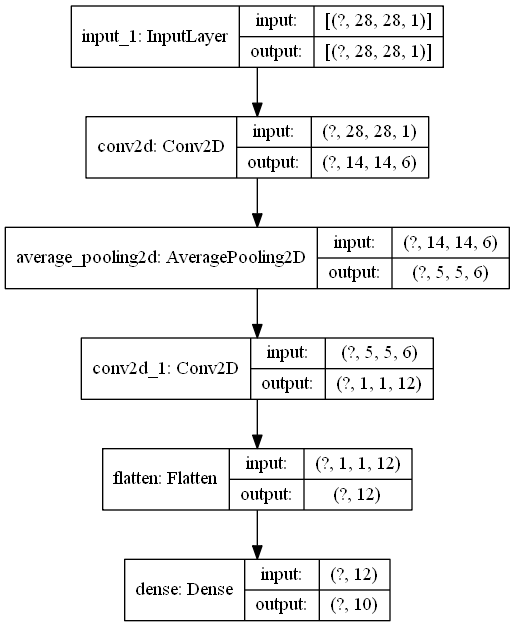

In [14]:
plot_model(model, show_shapes=True)

## Test Modification Archi 3
- Remplacement Dense 10 to 84 and 1 to 10 --> 93%
- Test compression 50% --> 150/2 = 75 --> 91% 

In [15]:
#model = keras.models.Sequential([
#		keras.layers.Input([28, 28, 1]),
#		keras.layers.Conv2D(6, kernel_size=2, strides=3, activation='relu', padding='same'),
#		keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),
#		keras.layers.Flatten(),
#		keras.layers.Dense(10, activation='tanh'),
#		keras.layers.Dense(1, activation='softmax'),

In [16]:
model = keras.models.Sequential([
		keras.layers.Input([28, 28, 1]),
		keras.layers.Conv2D(6, kernel_size=2, strides=3, activation='relu', padding='same'),
		keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),
		keras.layers.Flatten(),
		keras.layers.Dense(75, activation='tanh'),
		keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))
print(model.evaluate(test_x, test_y))

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.7764 - accuracy: 0.7582 - val_loss: 0.5178 - val_accuracy: 0.8394
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4710 - accuracy: 0.8503 - val_loss: 0.4074 - val_accuracy: 0.8722
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3956 - accuracy: 0.8746 - val_loss: 0.3661 - val_accuracy: 0.8844
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3555 - accuracy: 0.8862 - val_loss: 0.3400 - val_accuracy: 0.8936
Epoch 5/5
10000/10000 [==============================] - 1s 82us/sample - loss: 0.3021 - accuracy: 0.9033
[0.30213706984519956, 0.9033]


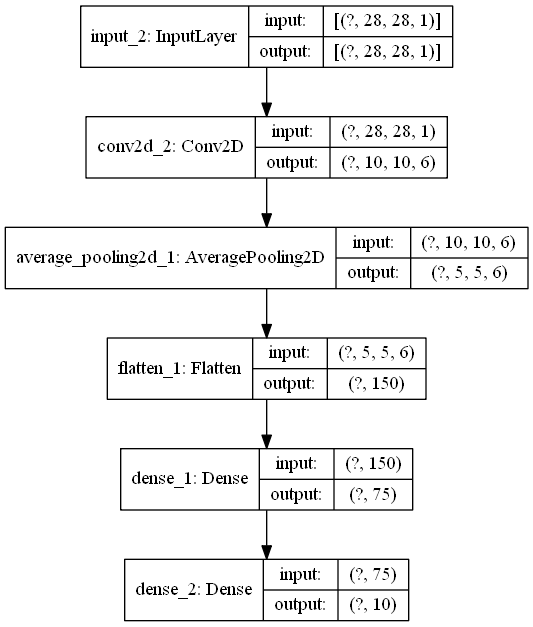

In [18]:
plot_model(model, show_shapes=True)

# Test 4 : Modification units in Dense Layer
- modifie dense layer + hyperparameter
- units descentent 

In [35]:
test4 = data[30:40]

In [36]:
test4

,file_name,training_time(s),result_loss,result_acc,nb_layers
30,archi_random_1_v,78.577000,0.07949067450854927,0.9749,NaN
31,archi_random_2_v,26.064321,0.3050533406496048,0.9019,NaN
32,archi_random_3_v,38.000784,0.9061476766586304,0.6993,NaN
33,archi_random_4_v,32.505703,0.49440958783626554,0.8485,NaN
34,archi_random_5_v,174.221448,0.08991098543666304,0.9727,NaN
35,archi_random_6_v,126.103547,0.06494664726108312,0.9795,NaN
36,archi_random_7_v,39.659550,0.21348144231140614,0.9326,NaN
37,archi_random_8_v,62.830789,0.1700618218511343,0.9467,NaN
38,archi_random_9_v,72.800281,0.07581218082737178,0.9733,NaN
39,archi_random_10_v,173.105033,0.04451985499598086,0.9867,NaN


In [37]:
model = keras.models.Sequential([
		keras.layers.Input([28, 28, 1]),
		keras.layers.Conv2D(6, kernel_size=2, strides=1, activation='relu', padding='same'),
		keras.layers.AveragePooling2D(pool_size=2, strides=1, padding='valid'),
		keras.layers.Conv2D(12, kernel_size=5, strides=3, activation='tanh', padding='same'),
		keras.layers.AveragePooling2D(pool_size=5, strides=1, padding='same'),
		keras.layers.Conv2D(36, kernel_size=2, strides=2, activation='relu', padding='valid'),
		keras.layers.MaxPooling2D(pool_size=5, strides=2, padding='same'),
		keras.layers.Conv2D(144, kernel_size=3, strides=2, activation='tanh', padding='same'),
		keras.layers.Flatten(),
		keras.layers.Dense(43, activation='selu'),
		keras.layers.Dense(30, activation='relu'),
		keras.layers.Dense(10, activation='softmax'),
	])

In [38]:
for layer in model.layers:
    print(layer.output_shape)

(None, 28, 28, 6)
(None, 27, 27, 6)
(None, 9, 9, 12)
(None, 9, 9, 12)
(None, 4, 4, 36)
(None, 2, 2, 36)
(None, 1, 1, 144)
(None, 144)
(None, 43)
(None, 30)
(None, 10)


In [39]:
test4_result_acc = str_to_float(test4['result_acc'])
test4_train_time = str_to_float(test4['training_time(s)'])

In [40]:
test4_result_mean = mean(test4_result_acc)
test4_time_mean = mean(test4_train_time)

In [41]:
test4_result_mean

0.92161

In [42]:
test4_time_mean

82.3868455171585

# Test 5 : Output size change for feature extraction
- be more permisive for feature extraction the dimension output can be more than 1

In [43]:
test5 = data[40:50]

In [44]:
test5

,file_name,training_time(s),result_loss,result_acc,nb_layers
40,archi_random_1_v,80.436753,0.28769842363297937,0.9085,7.0
41,archi_random_2_v,78.281544,0.07176919159367681,0.9763,10.0
42,archi_random_3_v,99.566410,0.08566732091791927,0.9713,7.0
43,archi_random_4_v,72.470139,0.07129717184931506,0.9798,4.0
44,archi_random_5_v,80.335786,0.0983532029479742,0.9684,5.0
45,archi_random_6_v,77.240802,0.1079084203535691,0.9665,8.0
46,archi_random_7_v,68.080561,0.6093278242111206,0.7882,7.0
47,archi_random_8_v,79.826793,0.05153364449184155,0.9847,9.0
48,archi_random_9_v,89.967481,0.4208268416404724,0.869,8.0
49,archi_random_10_v,81.815753,0.0887117653799709,0.9775,7.0


In [45]:
test5_result_acc = str_to_float(test5['result_acc'])
test5_train_time = str_to_float(test5['training_time(s)'])

In [46]:
test5_result_mean = mean(test5_result_acc)
test5_time_mean = mean(test5_train_time)

In [47]:
test5_result_mean

0.93902

In [48]:
test5_time_mean

80.80220222473145

## look archi 10

In [49]:
model = keras.models.Sequential([
		keras.layers.Input([28, 28, 1]),
		keras.layers.Conv2D(6, kernel_size=3, strides=1, activation='tanh', padding='same'),
		keras.layers.AveragePooling2D(pool_size=3, strides=3, padding='same'),
		keras.layers.Conv2D(12, kernel_size=3, strides=1, activation='selu', padding='valid'),
		keras.layers.Flatten(),
		keras.layers.Dense(230, activation='relu'),
		keras.layers.Dense(161, activation='selu'),
		keras.layers.Dense(10, activation='softmax'),

	])

In [50]:
for layer in model.layers:
    print(layer.output_shape)

(None, 28, 28, 6)
(None, 10, 10, 6)
(None, 8, 8, 12)
(None, 768)
(None, 230)
(None, 161)
(None, 10)


# Test4 vs Test5

In [51]:
test4vs5 = pd.concat([test4,test5])

In [52]:
test4vs5['test'] = ['test4','test4','test4','test4','test4','test4','test4','test4','test4','test4',
                    'test5','test5','test5','test5','test5','test5','test5','test5','test5','test5']
test4vs5['training_time(s)'] = test4_train_time + test5_train_time
test4vs5['result_acc'] = test4_result_acc + test5_result_acc

test4vs5

,file_name,training_time(s),result_loss,result_acc,nb_layers,test
30,archi_random_1_v,78.577000,0.07949067450854927,0.9749,NaN,test4
31,archi_random_2_v,26.064321,0.3050533406496048,0.9019,NaN,test4
32,archi_random_3_v,38.000784,0.9061476766586304,0.6993,NaN,test4
33,archi_random_4_v,32.505703,0.49440958783626554,0.8485,NaN,test4
34,archi_random_5_v,174.221448,0.08991098543666304,0.9727,NaN,test4
35,archi_random_6_v,126.103547,0.06494664726108312,0.9795,NaN,test4
36,archi_random_7_v,39.659550,0.21348144231140614,0.9326,NaN,test4
37,archi_random_8_v,62.830789,0.1700618218511343,0.9467,NaN,test4
38,archi_random_9_v,72.800281,0.07581218082737178,0.9733,NaN,test4
39,archi_random_10_v,173.105033,0.04451985499598086,0.9867,NaN,test4


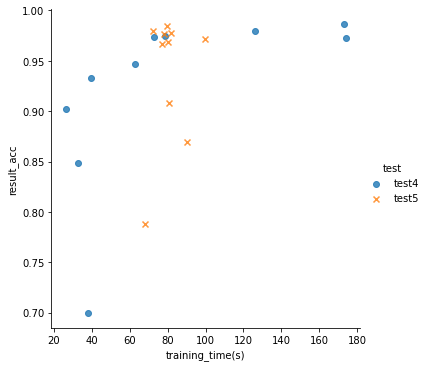

In [53]:
sns.lmplot(
    x='training_time(s)',
    y='result_acc',
    data=test4vs5,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

<AxesSubplot:xlabel='test', ylabel='result_acc'>

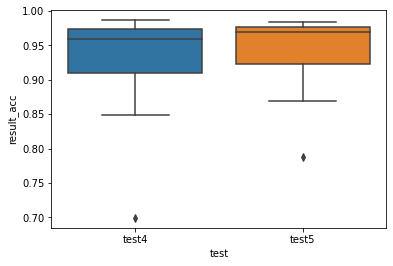

In [54]:
sns.boxplot(y='result_acc', x='test', data=test4vs5)

<AxesSubplot:xlabel='test', ylabel='training_time(s)'>

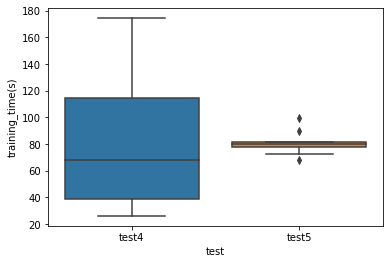

In [55]:
sns.boxplot(y='training_time(s)', x='test', data=test4vs5)

# Test 6 : Changing Of datasets
- add data : nb_layers
- Changing data set cifar10

In [56]:
test6 = data[50:60]

In [57]:
test6

,file_name,training_time(s),result_loss,result_acc,nb_layers
50,archi_random_1_v,284.356250,1.319706752204895,0.5354,8.0
51,archi_random_2_v,79.453151,1.3215685962677002,0.5299,6.0
52,archi_random_3_v,158.337115,0.9997873784065247,0.6487,10.0
53,archi_random_4_v,129.075104,1.6409194267272948,0.4081,8.0
54,archi_random_5_v,88.212016,1.2060903049468994,0.5706,9.0
55,archi_random_6_v,112.049885,0.9318056460380554,0.673,8.0
56,archi_random_7_v,103.088376,1.491281233406067,0.4531,8.0
57,archi_random_8_v,311.520396,1.0762317874908447,0.6487,6.0
58,archi_random_9_v,127.572627,1.304471019744873,0.5345,7.0
59,archi_random_10_v,91.236719,1.0980583166122437,0.6147,6.0


In [58]:
test6_result_acc = str_to_float(test6['result_acc'])
test6_train_time = str_to_float(test6['training_time(s)'])

In [59]:
test6_result_mean = mean(test6_result_acc)
test6_time_mean = mean(test6_train_time)

In [60]:
test6_time_mean

148.49016385078428

In [61]:
test6_result_mean

0.56167

# Test 5 vs Test 6

In [62]:
test5vs6 = pd.concat([test5,test6])

In [63]:
test5vs6['test'] = ['test5','test5','test5','test5','test5','test5','test5','test5','test5','test5',
                    'test6','test6','test6','test6','test6','test6','test6','test6','test6','test6']
test5vs6['training_time(s)'] = test5_train_time + test6_train_time
test5vs6['result_acc'] = test5_result_acc + test6_result_acc

test5vs6

,file_name,training_time(s),result_loss,result_acc,nb_layers,test
40,archi_random_1_v,80.436753,0.28769842363297937,0.9085,7.0,test5
41,archi_random_2_v,78.281544,0.07176919159367681,0.9763,10.0,test5
42,archi_random_3_v,99.566410,0.08566732091791927,0.9713,7.0,test5
43,archi_random_4_v,72.470139,0.07129717184931506,0.9798,4.0,test5
44,archi_random_5_v,80.335786,0.0983532029479742,0.9684,5.0,test5
45,archi_random_6_v,77.240802,0.1079084203535691,0.9665,8.0,test5
46,archi_random_7_v,68.080561,0.6093278242111206,0.7882,7.0,test5
47,archi_random_8_v,79.826793,0.05153364449184155,0.9847,9.0,test5
48,archi_random_9_v,89.967481,0.4208268416404724,0.8690,8.0,test5
49,archi_random_10_v,81.815753,0.0887117653799709,0.9775,7.0,test5


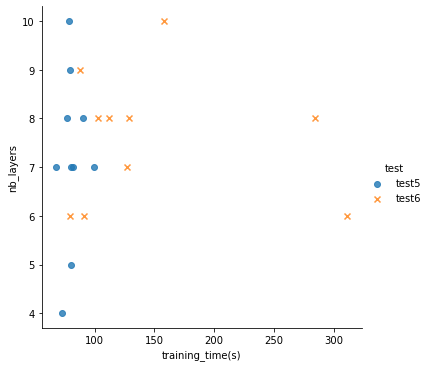

In [64]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test5vs6,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

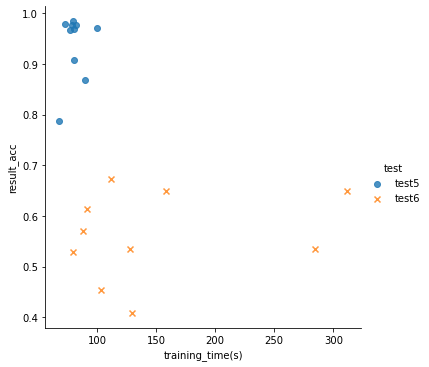

In [65]:
sns.lmplot(
    x='training_time(s)',
    y='result_acc',
    data=test5vs6,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

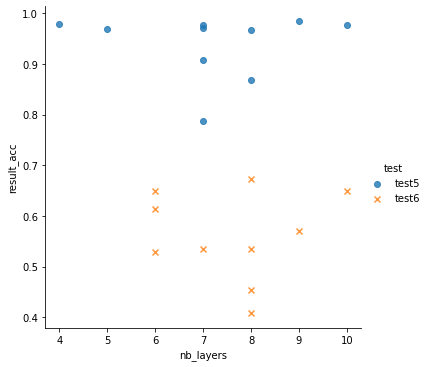

In [66]:
sns.lmplot(
    x='nb_layers',
    y='result_acc',
    data=test5vs6,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

<AxesSubplot:xlabel='test', ylabel='result_acc'>

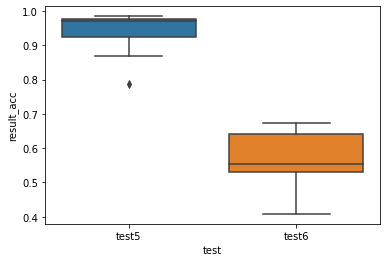

In [67]:
sns.boxplot(y='result_acc', x='test', data=test5vs6)

<AxesSubplot:xlabel='test', ylabel='training_time(s)'>

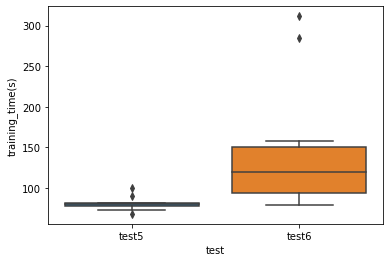

In [68]:
sns.boxplot(y='training_time(s)', x='test', data=test5vs6)

# Test 7 : Be more permisive
- kernel >= stride
- Dense random but units descendent

In [69]:
test7 = data[60:70]

In [70]:
test7

,file_name,training_time(s),result_loss,result_acc,nb_layers
60,archi_random_1_v,66.665968,1.4559755561828613,0.4941,11.0
61,archi_random_2_v,54.907562,1.226189895629883,0.5598,8.0
62,archi_random_3_v,85.760657,1.0567114471435546,0.6326,8.0
63,archi_random_4_v,150.838108,2.3026193523406984,0.1,12.0
64,archi_random_5_v,105.398270,2.3026360931396486,0.1,12.0
65,archi_random_6_v,107.269466,1.3648234617233277,0.5139,14.0
66,archi_random_7_v,59.813792,1.0785408752441406,0.6318,7.0
67,archi_random_8_v,40.819419,1.1243187145233153,0.6057,10.0
68,archi_random_9_v,264.545941,2.313665362548828,0.1,14.0
69,archi_random_10_v,112.826608,1.4747041839599608,0.4717,11.0


In [71]:
test7_result_acc = str_to_float(test7['result_acc'])
test7_train_time = str_to_float(test7['training_time(s)'])

In [72]:
test7_result_mean = mean(test7_result_acc)
test7_time_mean = mean(test7_train_time)

In [73]:
test7_result_mean

0.42096

In [74]:
test7_time_mean

104.88457922935486

# Test 5vs6vs7

In [75]:
test6vs7 = pd.concat([test6,test7])

In [76]:
test6vs7['test'] = ['test6','test6','test6','test6','test6','test6','test6','test6','test6','test6',
                       'test7','test7','test7','test7','test7','test7','test7','test7','test7','test7']
test6vs7['training_time(s)'] = test6_train_time + test7_train_time
test6vs7['result_acc'] = test6_result_acc + test7_result_acc

test6vs7

,file_name,training_time(s),result_loss,result_acc,nb_layers,test
50,archi_random_1_v,284.356250,1.319706752204895,0.5354,8.0,test6
51,archi_random_2_v,79.453151,1.3215685962677002,0.5299,6.0,test6
52,archi_random_3_v,158.337115,0.9997873784065247,0.6487,10.0,test6
53,archi_random_4_v,129.075104,1.6409194267272948,0.4081,8.0,test6
54,archi_random_5_v,88.212016,1.2060903049468994,0.5706,9.0,test6
55,archi_random_6_v,112.049885,0.9318056460380554,0.6730,8.0,test6
56,archi_random_7_v,103.088376,1.491281233406067,0.4531,8.0,test6
57,archi_random_8_v,311.520396,1.0762317874908447,0.6487,6.0,test6
58,archi_random_9_v,127.572627,1.304471019744873,0.5345,7.0,test6
59,archi_random_10_v,91.236719,1.0980583166122437,0.6147,6.0,test6


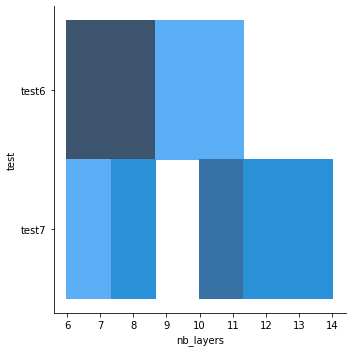

In [77]:
sns.displot(test6vs7, x='nb_layers', y='test')

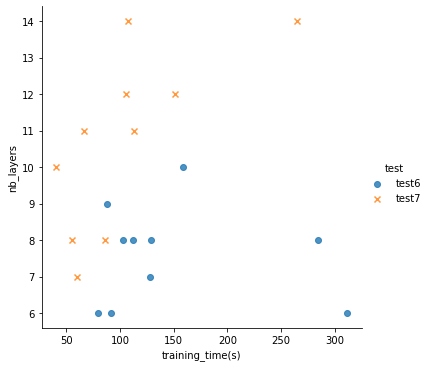

In [78]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test6vs7,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

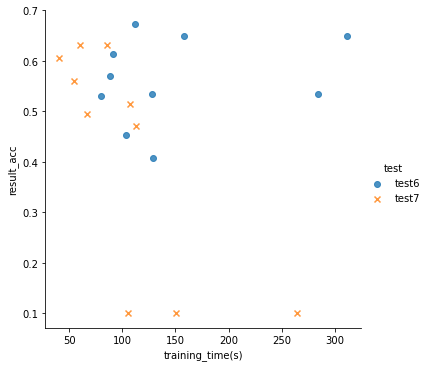

In [79]:
sns.lmplot(
    x='training_time(s)',
    y='result_acc',
    data=test6vs7,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

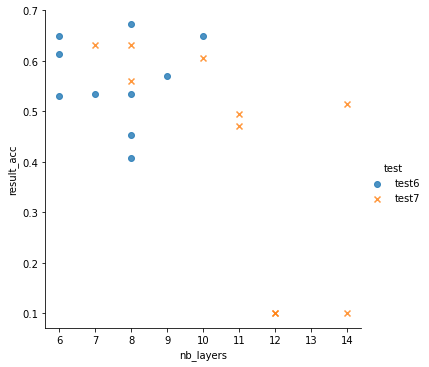

In [80]:
sns.lmplot(
    x='nb_layers',
    y='result_acc',
    data=test6vs7,
    hue='test',
    fit_reg=False,
    markers=["o", "x"]
)

<AxesSubplot:xlabel='test', ylabel='result_acc'>

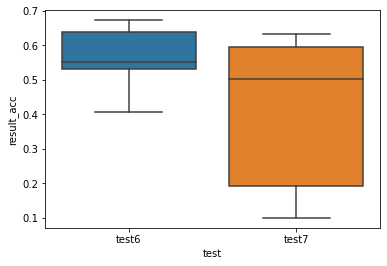

In [81]:
sns.boxplot(y='result_acc', x='test', data=test6vs7)

<AxesSubplot:xlabel='test', ylabel='training_time(s)'>

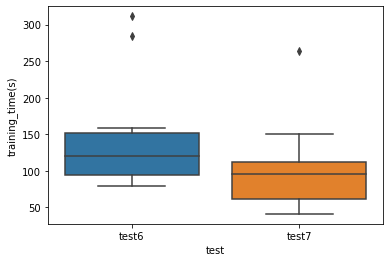

In [82]:
sns.boxplot(y='training_time(s)', x='test', data=test6vs7)

In [83]:
# 

In [106]:
t = test6vs7[:10]

<AxesSubplot:ylabel='training_time(s)'>

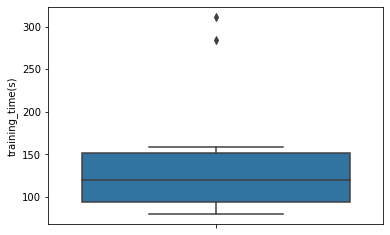

In [107]:
sns.boxplot(y='training_time(s)', data=t)

<AxesSubplot:ylabel='result_acc'>

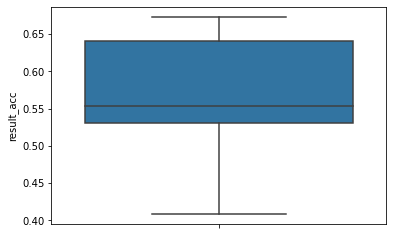

In [108]:
sns.boxplot(y='result_acc', data=t)

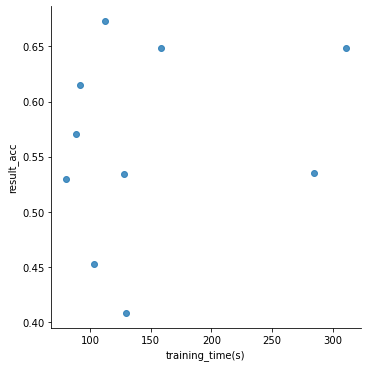

In [109]:
sns.lmplot(
    x='training_time(s)',
    y='result_acc',
    data=t,
    fit_reg=False
)